In [14]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 
import pylab
from scipy import stats
# from scipy.stats import kurtosis, skew
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Settings
# %matplotlib inline
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 30
# pd.set_option('display.precision', 4)

In [15]:
#load data
data = pd.read_excel('..\\data\\EquipmentAge.xlsx', index_col='SerialNumber')

#Verify data types
data.dtypes

Age_Found_Final          int64
Age_Estimated_Final    float64
dtype: object

In [16]:
#Convert data to float for calculations
data = data.astype(float)

#Verify data size
data.shape

(66382, 2)

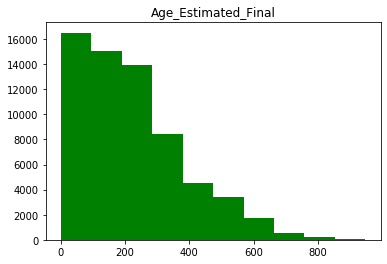

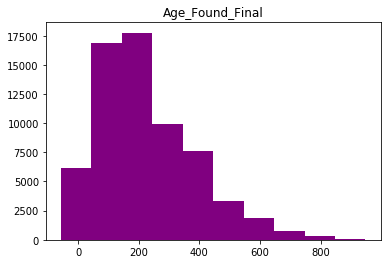

In [17]:
data.columns

test = data.dropna()
X = test[['Age_Found_Final']]
Y = test[['Age_Estimated_Final']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

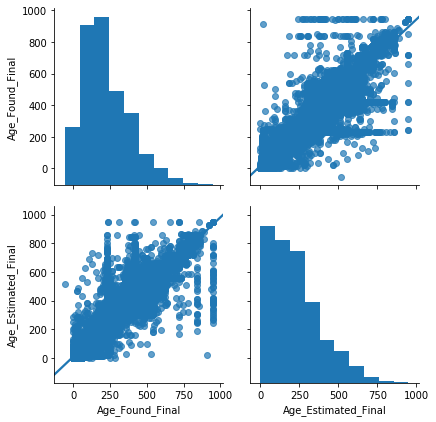

In [18]:
tpl = test[['Age_Found_Final','Age_Estimated_Final']]
#Scatter plot
sns.pairplot(tpl, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

In [19]:
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Age_Estimated_Final   R-squared (uncentered):                   0.967
Model:                             OLS   Adj. R-squared (uncentered):              0.967
Method:                  Least Squares   F-statistic:                          1.894e+06
Date:                 Tue, 19 May 2020   Prob (F-statistic):                        0.00
Time:                         17:03:27   Log-Likelihood:                     -3.4440e+05
No. Observations:                64522   AIC:                                  6.888e+05
Df Residuals:                    64521   BIC:                                  6.888e+05
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [20]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 2457.924235420704
MAE 26.635575959827914
RMSE 49.57745692772779


In [21]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.9
